# Tìm hiểu về bộ dữ liệu dự đoán bệnh tiểu đường
![Screenshot 2024-12-24 175751.png](<attachment:Screenshot 2024-12-24 175751.png>)
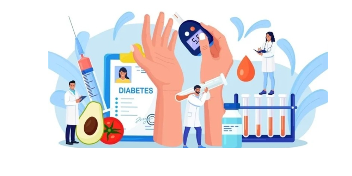

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from imblearn.over_sampling import SMOTE ,RandomOverSampler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_auc_score,recall_score,precision_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold,train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Thông tin tập dữ liệu    
Nguồn:  https://www.kaggle.com/datasets/kevintan701/diabetes-prediction-datasets

In [3]:
df=pd.read_csv('D:/Data Mining/diabetes_data.csv')
df.tail(5)

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
995,996,2023-12-26,65.783496,180.701502,143.099221,30.569152,0,1,0,6.363948,1,20.1,17.357712
996,997,2023-12-27,96.965298,169.734787,150.310102,0.000000,0,0,1,7.736771,1,33.7,73.000000
997,998,2023-12-28,79.612643,161.181253,90.329577,23.594044,0,0,1,4.000000,1,30.6,70.921787
998,999,2023-12-29,61.432315,168.369330,153.367057,62.867563,1,1,2,7.035861,1,21.7,10.000000
999,1000,2023-12-31,78.588742,162.550974,133.789638,37.212958,0,1,2,6.166246,1,29.7,40.696761


In [4]:
df.head(5)

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


Tập dữ liệu này gồm 1000 bản ghi và có các đặc trưng như sau:

* user_id: Mã định danh duy nhất được gán cho từng người dùng để đảm bảo quyền riêng tư và theo dõi dữ liệu.

* date: Đại diện cho ngày cụ thể cho mỗi bản ghi, cho biết bản chất chuỗi thời gian của tập dữ liệu.

* weight (kg): Trọng lượng cơ thể của người dùng tính bằng kg. Cân nặng là một yếu tố quan trọng trong việc xác định các nguy cơ liên quan đến béo phì.

* height (cm): Chiều cao của người dùng, được đo bằng cm. Điều này, kết hợp với cân nặng, giúp tính toán BMI, một yếu tố dự báo chính về nguy cơ mắc bệnh tiểu đường.

* blood_glucose (mg / dL): Lượng đường trong máu của người dùng tính bằng miligam trên decilit. Đây là một trong những chỉ số quan trọng nhất để chẩn đoán bệnh tiểu đường, với các giá trị thường dao động từ 70 đến 300 mg / dL.

* physical_activity (phút/ngày): Thời lượng hoạt động thể chất hàng ngày, được đo bằng phút. Hoạt động thể chất đóng một vai trò quan trọng trong việc kiểm soát lượng đường trong máu và giảm nguy cơ mắc bệnh tiểu đường.

* diet: Một biến phân loại mô tả chất lượng chế độ ăn uống của người dùng, được dán nhãn là 'lành mạnh' hoặc 'không lành mạnh'. Chế độ ăn uống đóng một vai trò quan trọng trong việc phòng ngừa và quản lý bệnh tiểu đường.

* medication_adherence: Cho biết mức độ tuân thủ của người dùng đối với thuốc theo toa, được phân loại là 'tốt' hoặc 'kém'. Tuân thủ đúng cách là rất quan trọng để kiểm soát lượng đường trong máu một cách hiệu quả.

* stress_level: Mức độ căng thẳng do người dùng báo cáo, được phân loại là 'thấp', 'trung bình' hoặc 'cao'. Căng thẳng mãn tính có thể ảnh hưởng đáng kể đến lượng đường trong máu và góp phần gây ra nguy cơ mắc bệnh tiểu đường.

* sleep_hours (giờ): Số giờ người dùng ngủ mỗi ngày. Ngủ đủ giấc là rất quan trọng để duy trì sức khỏe tổng thể và ổn định lượng đường trong máu.

* hydration_level: Cho biết người dùng có đủ nước hay không, với các giá trị 'có' hoặc 'không'. Hydrat hóa thích hợp hỗ trợ chức năng cơ thể tối ưu, bao gồm duy trì cân bằng đường huyết.

* bmi: Chỉ số khối cơ thể, được tính bằng cân nặng và chiều cao của người dùng. Chỉ số BMI là một chỉ số quan trọng cho thấy một cá nhân có thiếu cân, cân nặng bình thường, thừa cân hay béo phì, có liên quan trực tiếp đến nguy cơ mắc bệnh tiểu đường.

* risk_score: Điểm rủi ro được tính toán cho mỗi người dùng, được tạo dựa trên các chỉ số sức khỏe khác nhau. Điểm số này giúp phân loại người dùng thành các mức độ rủi ro khác nhau:

-Nguy cơ thấp (< 30): Người dùng được coi là có khả năng phát triển bệnh tiểu đường thấp.

In [5]:
df.shape

(1000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   object 
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB


In [7]:
df.nunique()

user_id                 1000
date                    1000
weight                   984
height                   982
blood_glucose            964
physical_activity        925
diet                       2
medication_adherence       2
stress_level               3
sleep_hours              927
hydration_level            2
bmi                      257
risk_score               899
dtype: int64

Sau khi xem các đặc trưng độc nhất, ta có thể thấy một số điều quan trọng như sau:
* Đây là tập dữ liệu kiểm tra trên quy mô 1000 người trong vòng 1000 ngày (gần 3 năm).
* Các chỉ số như cân năng (weight), chiều cao (height), chỉ số đường huyết (blood_glucose), thời lượng vận động (physical_activity), thời gian ngủ (sleep_hours) và chỉ số khả năng (rick_score) có tích độc nhất trên từng người là khá cao.
* Chế độ ăn uống (diet) chỉ có 2 loại là ăn uống lành mạnh và ăn uống không lành mạnh.
* Tuân thủ thuốc (medication_adherence): cho biết mức độ tuân thủ, 2 nhãn là tuân thủ và không tuân thủ.
* Mức độ căng thẳng (stress_level): có 3 nhãn là căng thẳng thấp, vừa và cao.
* Trạng thái hydration (hydration_level): cho biết người tham gia có uống đầy đủ nước hay không, có hoặc không.
* Cho thấy người này đang ở trạng thái gì, béo vừa hay là thiếu cân.
  

In [8]:
df.isna().sum()

user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk_score              0
dtype: int64

In [9]:
df.isnull().sum()

user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk_score              0
dtype: int64

In [10]:
df.columns

Index(['user_id', 'date', 'weight', 'height', 'blood_glucose',
       'physical_activity', 'diet', 'medication_adherence', 'stress_level',
       'sleep_hours', 'hydration_level', 'bmi', 'risk_score'],
      dtype='object')

In [11]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
date,1000,1000,2021-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,1000.0,NaN,NaN,NaN,70.361797,14.467165,40.0,60.286145,70.379509,79.719158,120.0
height,1000.0,NaN,NaN,NaN,170.795375,9.742934,150.0,163.937583,170.630771,177.288822,200.0
blood_glucose,1000.0,NaN,NaN,NaN,140.818899,38.064177,70.0,114.080015,139.989969,166.436613,297.049508
physical_activity,1000.0,NaN,NaN,NaN,30.294497,19.305165,0.0,15.251591,30.003691,43.338908,94.861859
diet,1000.0,NaN,NaN,NaN,0.604,0.489309,0.0,0.0,1.0,1.0,1.0
medication_adherence,1000.0,NaN,NaN,NaN,0.693,0.46148,0.0,0.0,1.0,1.0,1.0
stress_level,1000.0,NaN,NaN,NaN,0.95,0.833183,0.0,0.0,1.0,2.0,2.0
sleep_hours,1000.0,NaN,NaN,NaN,7.076312,1.883829,4.0,5.688762,6.998834,8.391989,12.0


# Trực quan hóa dữ liệu

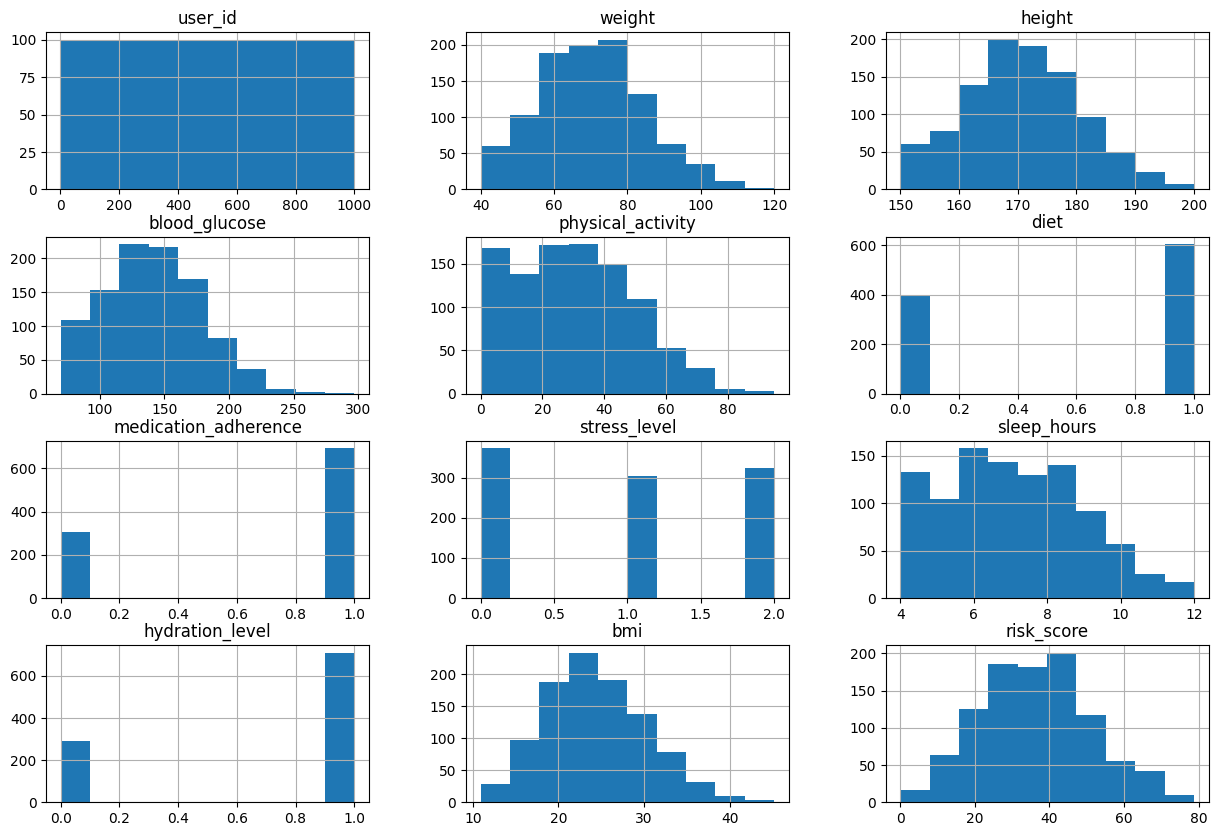

In [12]:
df.hist(figsize=(15,10))
plt.get_figlabels()
plt.show()

Mục tiêu của đầu ra là nguy cơ mắc bệnh/ nguy cơ có bệnh là cao.    
* Input: .....
* Output: rick_score    
--> Phân loại tỷ lệ mắc bênh (rick_score >=30): Có khả năng cao, ngược lại là khả năng thấp hoặc không có khả năng.

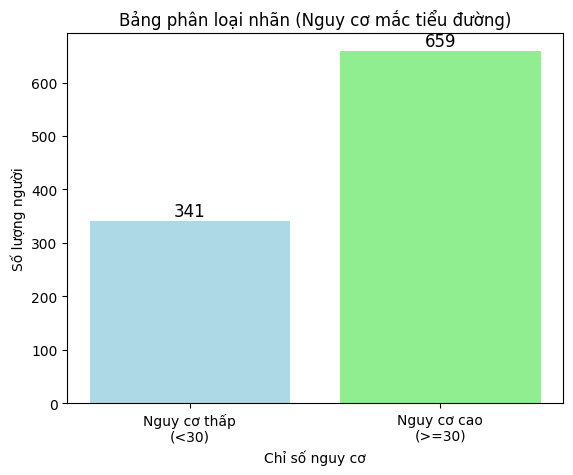

In [13]:
# Phân loại khả năng mắc tiểu đường
sick=np.sum(df['risk_score']>=30)
disease_free=np.sum(df['risk_score']<30)

# Vẽ biểu đồ cột
categories=['Nguy cơ thấp\n(<30)','Nguy cơ cao\n(>=30)']
values=[disease_free,sick]

fig,ax=plt.subplots()
bars=ax.bar(categories,
            values,
            color=['lightblue','lightgreen'])

# Thêm tiêu đề cho nhãn
plt.title('Bảng phân loại nhãn (Nguy cơ mắc tiểu đường)')
plt.xlabel('Chỉ số nguy cơ')
plt.ylabel('Số lượng người')

# Hiển thị số lượng lên từng cột
for bar in bars:
    yval=bar.get_height()
    ax.text(bar.get_x() +bar.get_width()/2,
            yval+1,
            str(int(yval)),
            ha='center',
            va='bottom',
            fontsize=12
            )
plt.show()

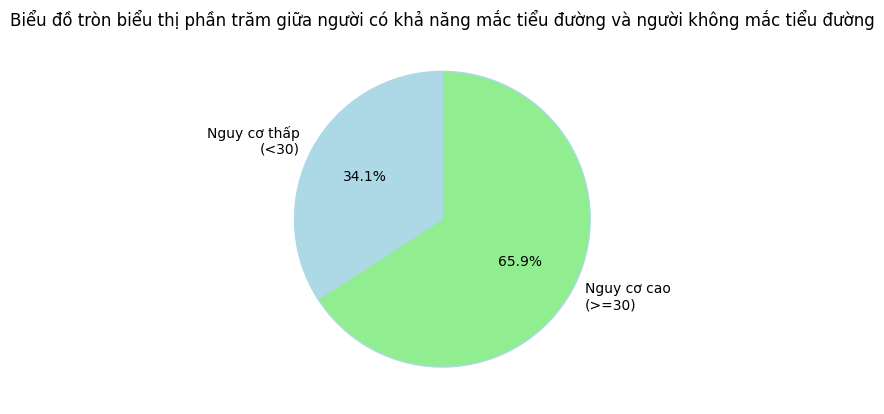

In [14]:
# Vẽ biểu đồ tròn biểu thị phần trăm của sản phẩm
fig,ax=plt.subplots()
ax.pie(values,
       labels=categories,
       autopct='%1.1f%%',
       startangle=90,
       colors=['lightblue','lightgreen'],
       wedgeprops={'edgecolor':'lightblue'}
)

plt.title('Biểu đồ tròn biểu thị phần trăm giữa người có khả năng mắc tiểu đường và người không mắc tiểu đường')
plt.show()

C:\Users\vanho\AppData\Local\Temp\ipykernel_15028\2473101781.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['weight'],shade=True,color='b')


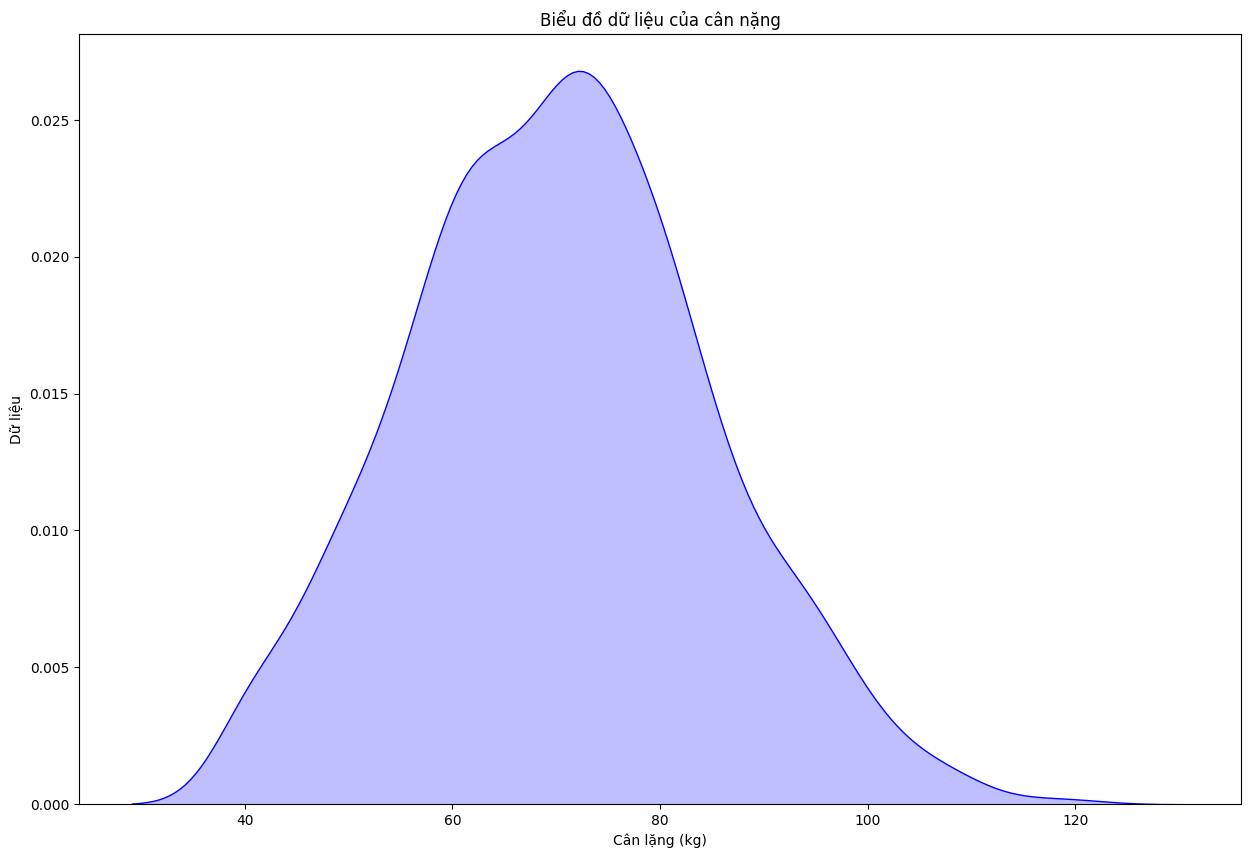

In [15]:
# trực quan dữ liệu cân nặng
plt.figure(figsize=(15,10))
sns.kdeplot(df['weight'],shade=True,color='b')
plt.title('Biểu đồ dữ liệu của cân nặng')
plt.xlabel('Cân lặng (kg)')
plt.ylabel('Dữ liệu')
plt.show()

C:\Users\vanho\AppData\Local\Temp\ipykernel_15028\3784032868.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['height'],shade=True,color='b')


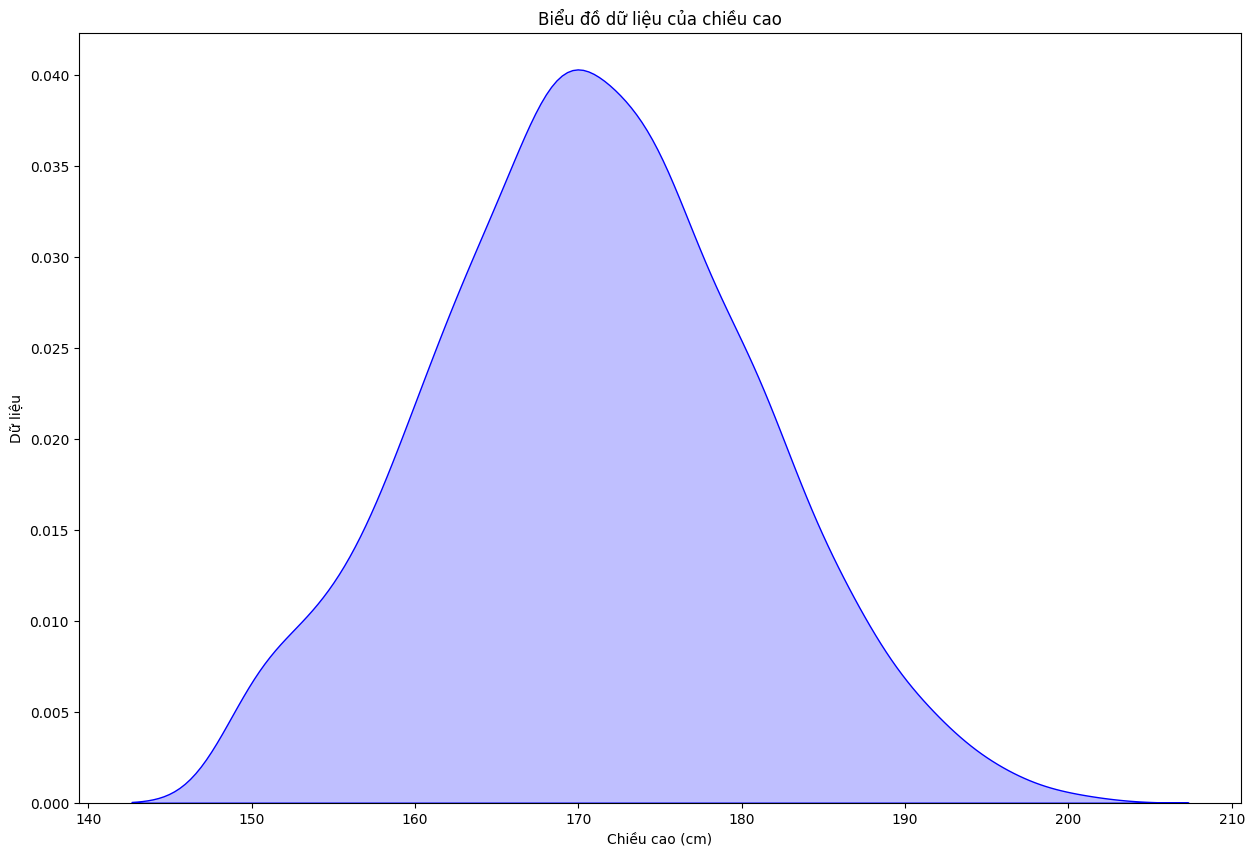

In [16]:
# Trực quan dữ liệu chiều cao
plt.figure(figsize=(15,10))
sns.kdeplot(df['height'],shade=True,color='b')
plt.title('Biểu đồ dữ liệu của chiều cao')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Dữ liệu')
plt.show()

# Tiền xử lý dữ liệu

In [17]:
data=df.copy()

In [18]:
data.tail()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
995,996,2023-12-26,65.783496,180.701502,143.099221,30.569152,0,1,0,6.363948,1,20.1,17.357712
996,997,2023-12-27,96.965298,169.734787,150.310102,0.000000,0,0,1,7.736771,1,33.7,73.000000
997,998,2023-12-28,79.612643,161.181253,90.329577,23.594044,0,0,1,4.000000,1,30.6,70.921787
998,999,2023-12-29,61.432315,168.369330,153.367057,62.867563,1,1,2,7.035861,1,21.7,10.000000
999,1000,2023-12-31,78.588742,162.550974,133.789638,37.212958,0,1,2,6.166246,1,29.7,40.696761


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   object 
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB


In [20]:
df.columns

Index(['user_id', 'date', 'weight', 'height', 'blood_glucose',
       'physical_activity', 'diet', 'medication_adherence', 'stress_level',
       'sleep_hours', 'hydration_level', 'bmi', 'risk_score'],
      dtype='object')

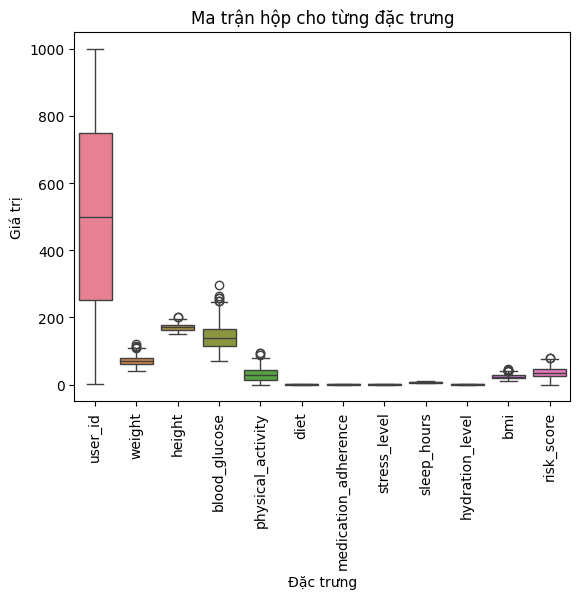

In [21]:
plt.Figure(figsize=(12,6))
sns.boxplot(data=data)

#Thêm tiêu đề và nhãn
plt.title("Ma trận hộp cho từng đặc trưng") 
plt.xlabel("Đặc trưng")
plt.ylabel("Giá trị")
plt.xticks(rotation=90)
plt.show()

In [22]:
def handle_outliers_iqr(data, columns):
    for col in columns:
        if data[col].dtype in ['int64', 'float64']:  # Chỉ xử lý dữ liệu số
            Q1 = data[col].quantile(0.25)  # Tính Q1 (quartile 1)
            Q3 = data[col].quantile(0.75)  # Tính Q3 (quartile 3)
            IQR = Q3 - Q1                  # Tính IQR
            lower_bound = Q1 - 1.5 * IQR   # Giới hạn dưới
            upper_bound = Q3 + 1.5 * IQR   # Giới hạn trên

            # Clipping các giá trị ngoài khoảng
            data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
            data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

In [23]:

columns_to_process = ['user_id', 'date', 'weight', 'height', 'blood_glucose',
       'physical_activity', 'diet', 'medication_adherence', 'stress_level',
       'sleep_hours', 'hydration_level', 'bmi', 'risk_score']
data_cleaned=handle_outliers_iqr(data,columns_to_process)

In [24]:
data_cleaned.tail(5)

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
995,996.0,2023-12-26,65.783496,180.701502,143.099221,30.569152,0.0,1.0,0.0,6.363948,1.0,20.1,17.357712
996,997.0,2023-12-27,96.965298,169.734787,150.310102,0.000000,0.0,0.0,1.0,7.736771,1.0,33.7,73.000000
997,998.0,2023-12-28,79.612643,161.181253,90.329577,23.594044,0.0,0.0,1.0,4.000000,1.0,30.6,70.921787
998,999.0,2023-12-29,61.432315,168.369330,153.367057,62.867563,1.0,1.0,2.0,7.035861,1.0,21.7,10.000000
999,1000.0,2023-12-31,78.588742,162.550974,133.789638,37.212958,0.0,1.0,2.0,6.166246,1.0,29.7,40.696761


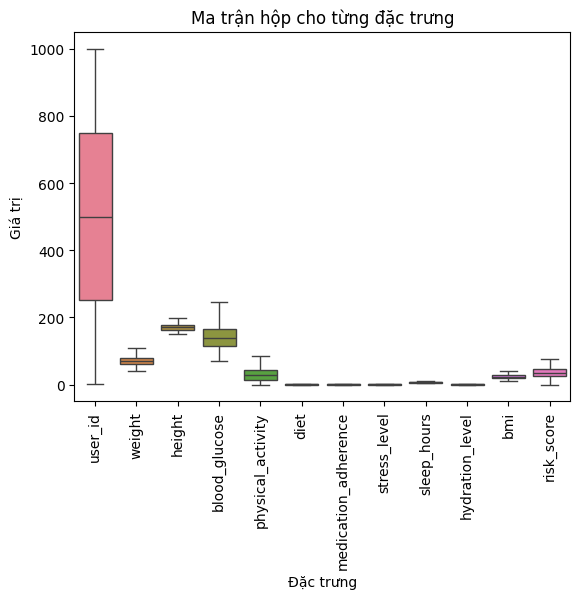

In [25]:
plt.Figure(figsize=(12,6))
sns.boxplot(data=data_cleaned)

#Thêm tiêu đề và nhãn
plt.title("Ma trận hộp cho từng đặc trưng") 
plt.xlabel("Đặc trưng")
plt.ylabel("Giá trị")
plt.xticks(rotation=90)
plt.show()

Đầu tiên ta phải chuyển lại dữ liệu cho cột date

In [26]:
Label_encoder_date=LabelEncoder()
data_cleaned['date']=Label_encoder_date.fit_transform(data_cleaned['date'])

In [27]:
data_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,500.500000,288.819436,1.0,250.750000,500.500000,750.250000,1000.000000
date,1000.0,499.500000,288.819436,0.0,249.750000,499.500000,749.250000,999.000000
weight,1000.0,70.340800,14.404793,40.0,60.286145,70.379509,79.719158,108.868677
height,1000.0,170.790007,9.727552,150.0,163.937583,170.630771,177.288822,197.315680
blood_glucose,1000.0,140.711800,37.723088,70.0,114.080015,139.989969,166.436613,244.971508
physical_activity,1000.0,30.275635,19.247242,0.0,15.251591,30.003691,43.338908,85.469884
diet,1000.0,0.604000,0.489309,0.0,0.000000,1.000000,1.000000,1.000000
medication_adherence,1000.0,0.693000,0.461480,0.0,0.000000,1.000000,1.000000,1.000000
stress_level,1000.0,0.950000,0.833183,0.0,0.000000,1.000000,2.000000,2.000000
sleep_hours,1000.0,7.076312,1.883829,4.0,5.688762,6.998834,8.391989,12.000000


Tiếp theo, ta cần phân loại cột nhãn thành 2 loại, ứng với 0-30 là tỷ lệ nhiễm thấp, trên 30 là tỷ lệ nhiễm cao

In [28]:
data_cleaned['risk'] = pd.cut(
    data_cleaned['risk_score'],
    bins=[0, 30, 100],       # Định nghĩa các khoảng
    labels=[0, 1],           # Nhãn cho các khoảng
    include_lowest=True      # Bao gồm biên dưới của khoảng
)
data_cleaned['risk'] = data_cleaned['risk'].fillna(0).astype(int)
data_cleaned.drop(columns=['risk_score'], inplace=True)
data_cleaned.tail()



,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk
995,996.0,995,65.783496,180.701502,143.099221,30.569152,0.0,1.0,0.0,6.363948,1.0,20.1,0
996,997.0,996,96.965298,169.734787,150.310102,0.000000,0.0,0.0,1.0,7.736771,1.0,33.7,1
997,998.0,997,79.612643,161.181253,90.329577,23.594044,0.0,0.0,1.0,4.000000,1.0,30.6,1
998,999.0,998,61.432315,168.369330,153.367057,62.867563,1.0,1.0,2.0,7.035861,1.0,21.7,0
999,1000.0,999,78.588742,162.550974,133.789638,37.212958,0.0,1.0,2.0,6.166246,1.0,29.7,1


In [29]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   float64
 1   date                  1000 non-null   int32  
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   float64
 7   medication_adherence  1000 non-null   float64
 8   stress_level          1000 non-null   float64
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   float64
 11  bmi                   1000 non-null   float64
 12  risk                  1000 non-null   int32  
dtypes: float64(11), int32(2)
memory usage: 93.9 KB


In [30]:
data_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,500.500000,288.819436,1.0,250.750000,500.500000,750.250000,1000.000000
date,1000.0,499.500000,288.819436,0.0,249.750000,499.500000,749.250000,999.000000
weight,1000.0,70.340800,14.404793,40.0,60.286145,70.379509,79.719158,108.868677
height,1000.0,170.790007,9.727552,150.0,163.937583,170.630771,177.288822,197.315680
blood_glucose,1000.0,140.711800,37.723088,70.0,114.080015,139.989969,166.436613,244.971508
physical_activity,1000.0,30.275635,19.247242,0.0,15.251591,30.003691,43.338908,85.469884
diet,1000.0,0.604000,0.489309,0.0,0.000000,1.000000,1.000000,1.000000
medication_adherence,1000.0,0.693000,0.461480,0.0,0.000000,1.000000,1.000000,1.000000
stress_level,1000.0,0.950000,0.833183,0.0,0.000000,1.000000,2.000000,2.000000
sleep_hours,1000.0,7.076312,1.883829,4.0,5.688762,6.998834,8.391989,12.000000


In [31]:
data_cleaned.isna().sum()

user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk                    0
dtype: int64

# Huấn luyện mô hình

In [32]:
X=data_cleaned[['weight','height',
                'blood_glucose','physical_activity',
                'diet','medication_adherence',
                'stress_level','sleep_hours',
                'hydration_level','bmi']].values
y=data_cleaned['risk'].values

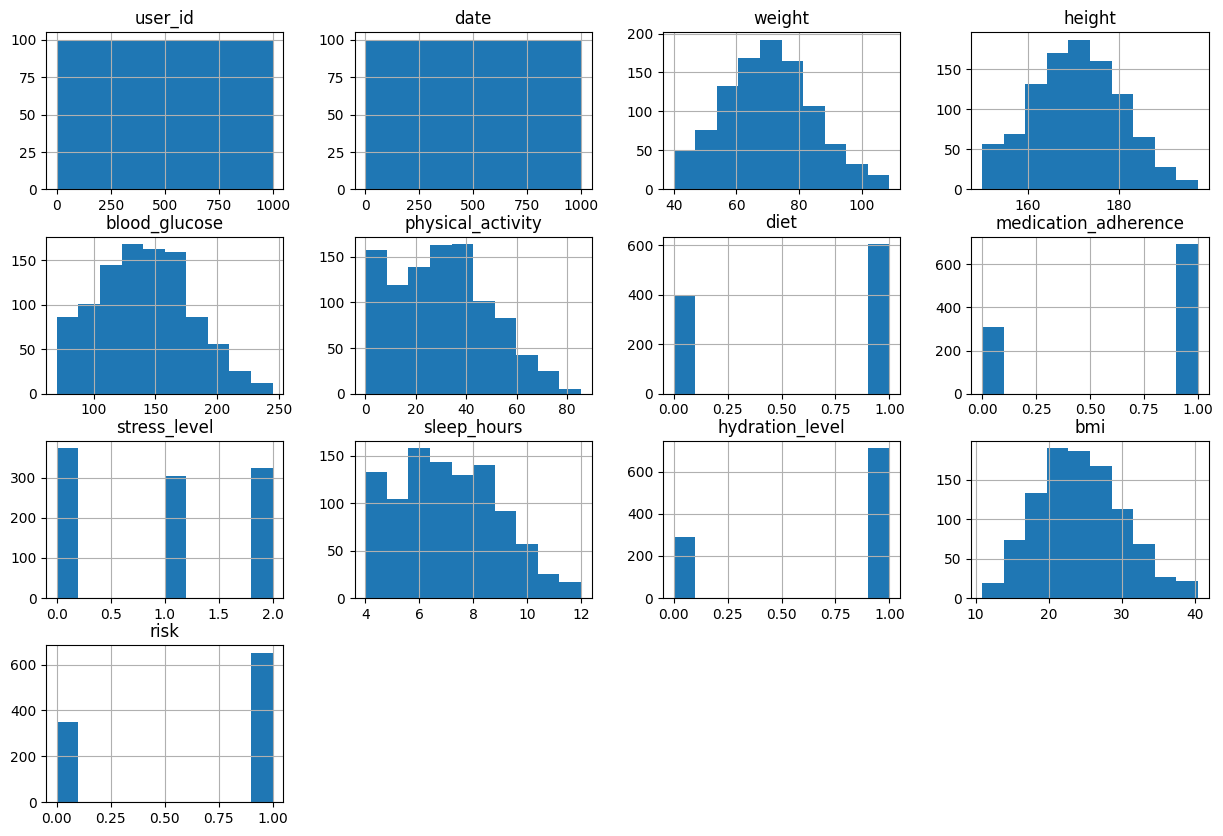

In [33]:
data_cleaned.hist(figsize=(15,10))
plt.get_figlabels()
plt.show()

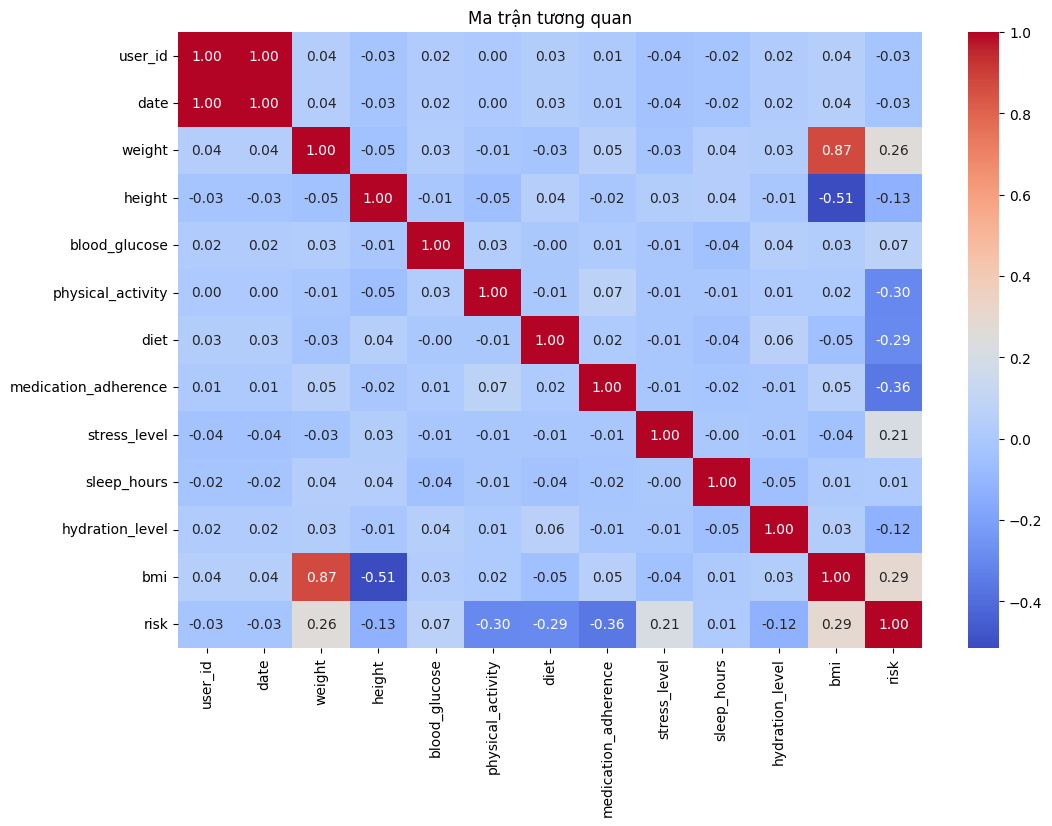

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan")
plt.show()

Cùng xem lại nhãn

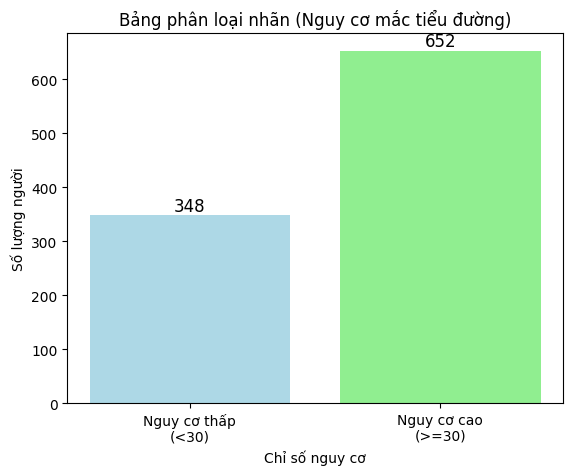

In [35]:
# Phân loại nhãn
sick=np.sum(data_cleaned['risk']==1)
disease_free=np.sum(data_cleaned['risk']==0)

categories=['Nguy cơ thấp\n(<30)','Nguy cơ cao\n(>=30)']
values=[disease_free,sick]

fig,ax=plt.subplots()
bars=ax.bar(categories,
            values,
            color=['lightblue','lightgreen'])

# Thêm tiêu đề cho nhãn
plt.title('Bảng phân loại nhãn (Nguy cơ mắc tiểu đường)')
plt.xlabel('Chỉ số nguy cơ')
plt.ylabel('Số lượng người')

# Hiển thị số lượng lên từng cột
for bar in bars:
    yval=bar.get_height()
    ax.text(bar.get_x() +bar.get_width()/2,
            yval+1,
            str(int(yval)),
            ha='center',
            va='bottom',
            fontsize=12
            )
plt.show()

Áp dụng phương pháp smote nhằm cân bằng dữ liệu nhãn (risk)

In [36]:
# Handing data imbalance
def augment_data(X, y, method='smote'):
  if method == 'smote':
    sampler = SMOTE(random_state=10)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  elif method == 'randomoversampler':
    sampler = RandomOverSampler(random_state=11)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  return X_resampled, y_resampled

In [37]:
def plot_class_distribution(y_train):
  class_distribution = pd.Series(y_train).value_counts()

  plt.figure(figsize=(15, 10))
  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
  plt.title('Phân phối dữ liệu mẫu ')
  plt.xlabel('Lớp')
  plt.ylabel('Số lượng mẫu')
  plt.show()

Áp dụng phương pháp Standard Scaler nhằm tránh mất cân bằng dữ liệu

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training set size: (1044, 10)



C:\Users\vanho\AppData\Local\Temp\ipykernel_15028\3695400365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


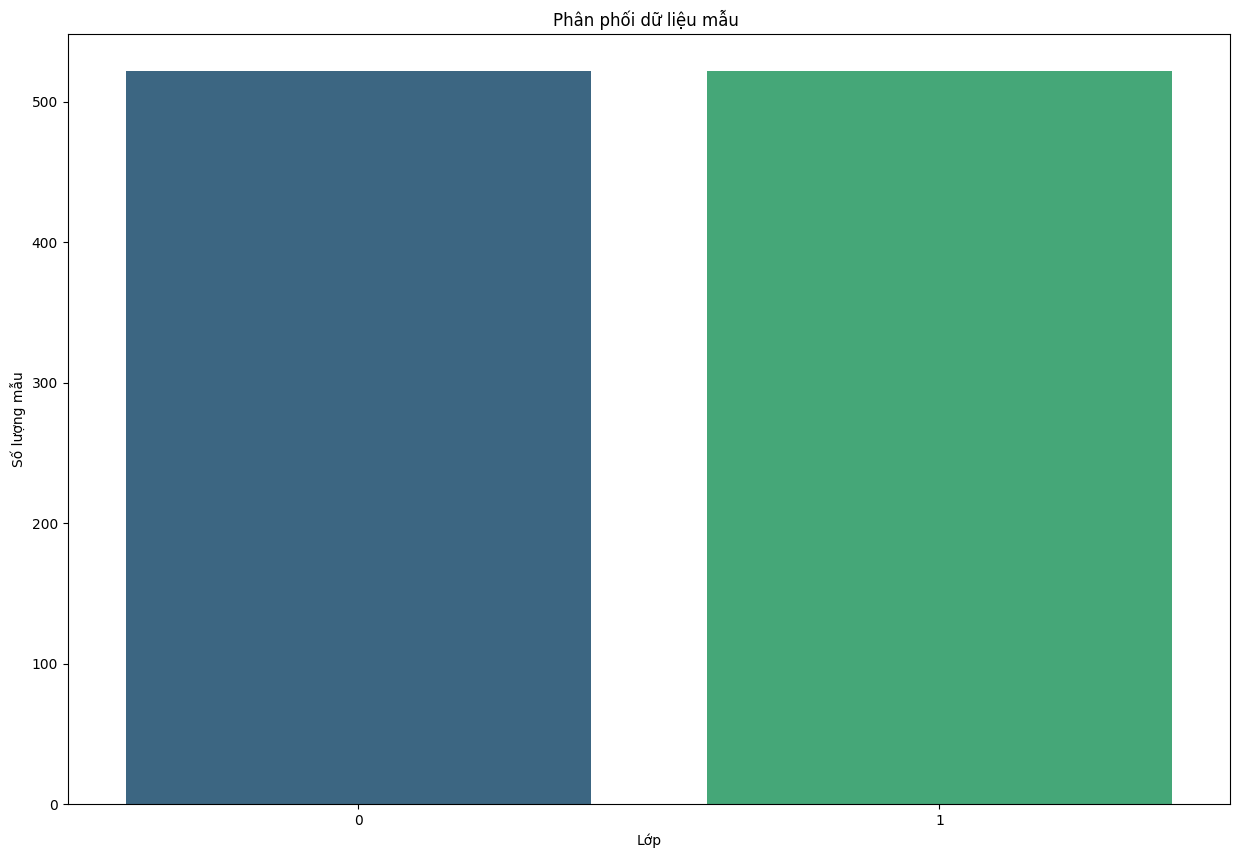

In [39]:
X_train_smote, y_train_smote = augment_data(X_train, y_train, method='smote')

print(f"Training set size: {X_train_smote.shape}\n")
plot_class_distribution(y_train_smote)

Hàm Train_KFold: Thực hiện quá trình huấn luyện mô hình với kỹ thuật K-Fold Cross-Validation.   
Sau đó tính toán và in ra độ chính xác (accuracy_score) trên mỗi lần chia và trung bình cho tất cả các lần

In [40]:
def Train_KFold(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=10)
    scores = []

    for train_index, test_index in kf.split(X):
        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Training model
        model.fit(X_train, y_train)

        # Predict on the test set of each k-fold
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    print(f"Accuracy on each fold: {scores}")
    print(f"Mean accuracy: {round(sum(scores) / len(scores)*100, 2)}%\n")
    return model

In [41]:
# Hàm GridSearch để tìm tham số tối ưu
def Gridsearch_params(model, param_grid, X, y):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X, y)
    
    # Lấy mô hình tốt nhất
    best_model = grid_search.best_estimator_

    print("Best parameters found:", grid_search.best_params_)
    print("Best mean accuracy:", round(grid_search.best_score_ * 100, 2), "%\n")
    
    return best_model


In [42]:
def evolution_models(model, X_test, y_test, average='weighted'):
    # Dự đoán nhãn
    y_pred = model.predict(X_test)
    
    # Báo cáo phân loại
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------")

    # Các chỉ số trọng số trung bình
    print(f"Recall : {recall_score(y_test, y_pred, average=average):0.4f}")
    print(f"Precision : {precision_score(y_test, y_pred, average=average):0.4f}")
    print(f"F1 score : {f1_score(y_test, y_pred, average=average):0.4f} \n")   

    # Ma trận nhầm lẫn
    labels = sorted(set(y_test))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix heatmap:")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    
    # # Lưu hình ảnh ma trận nhầm lẫn
    # plt.savefig("confusion_matrix.png")
    # print("Confusion matrix heatmap saved as 'confusion_matrix.png'.")


# Mô hình Logistic Regression

Áp dụng tham số mặc định

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        70
           1       0.87      0.86      0.86       130

    accuracy                           0.82       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.83      0.82      0.83       200

------------------------------------------
Recall : 0.8250
Precision : 0.8256
F1 score : 0.8253 



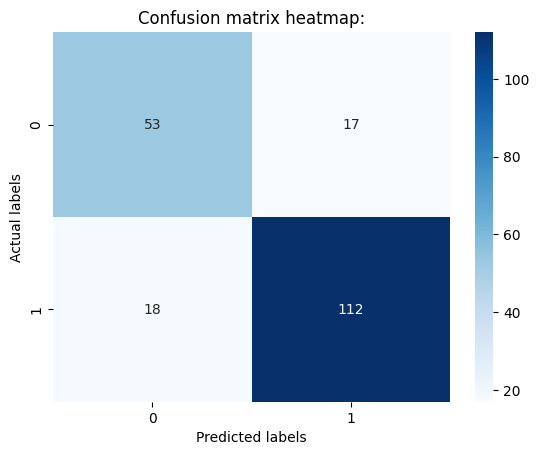

In [43]:
lr_1=LogisticRegression(penalty='l2',C=10).fit(X_train,y_train)
evolution_models(lr_1,X_test,y_test)

Áp dụng tham số sau khi sử dụng thuật toán smote

Accuracy on each fold: [0.8708133971291866, 0.784688995215311, 0.8660287081339713, 0.8325358851674641, 0.8509615384615384]
Mean accuracy: 84.1%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        70
           1       0.88      0.82      0.85       130

    accuracy                           0.81       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.82      0.81      0.82       200

------------------------------------------
Recall : 0.8150
Precision : 0.8229
F1 score : 0.8173 



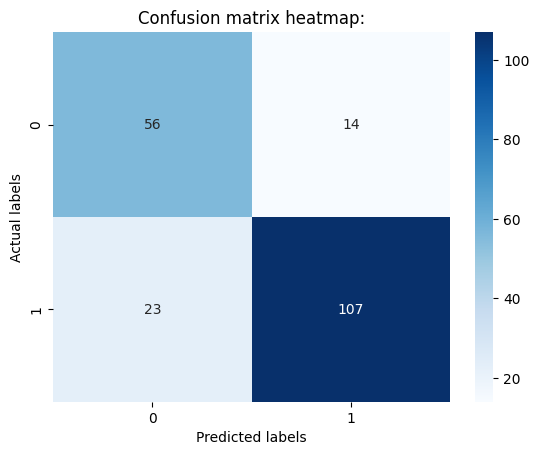

In [44]:
model_lr=LogisticRegression(penalty='l2',C=10)
smote_lr=Train_KFold(model_lr,X_train_smote,y_train_smote)
evolution_models(smote_lr,X_test,y_test)

Áp dụng tham số mặc định có sử dụng phương pháp param_grid nhằm chọn ra tham số tối ưu

Fitting 5 folds for each of 54 candidates, totalling 270 fits


d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters found: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Best mean accuracy: 84.62 %

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        70
           1       0.87      0.86      0.86       130

    accuracy                           0.82       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.83      0.82      0.83       200

------------------------------------------
Recall : 0.8250
Precision : 0.8256
F1 score : 0.8253 



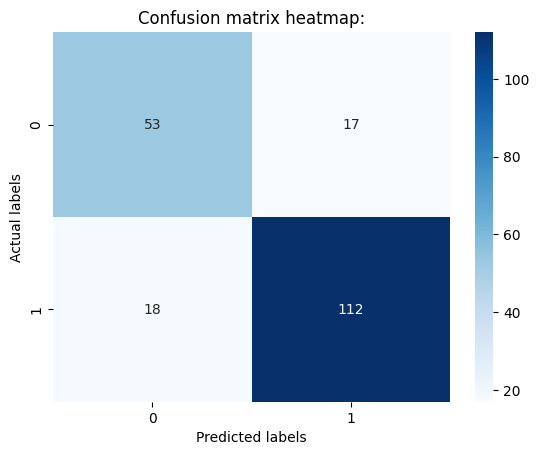

In [45]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l2'],
    'solver': ['saga','lbfgs','liblinear'],
    'max_iter': [200, 300, 500]
}
grid_lr=Gridsearch_params(model_lr,param_grid,X_train,y_train)
evolution_models(grid_lr,X_test,y_test)

Sử dụng phương pháp trên nhưng với tham số smote

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'C': 100, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}
Best mean accuracy: 85.53 %

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        70
           1       0.91      0.81      0.85       130

    accuracy                           0.82       200
   macro avg       0.80      0.83      0.81       200
weighted avg       0.83      0.82      0.82       200

------------------------------------------
Recall : 0.8200
Precision : 0.8342
F1 score : 0.8231 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


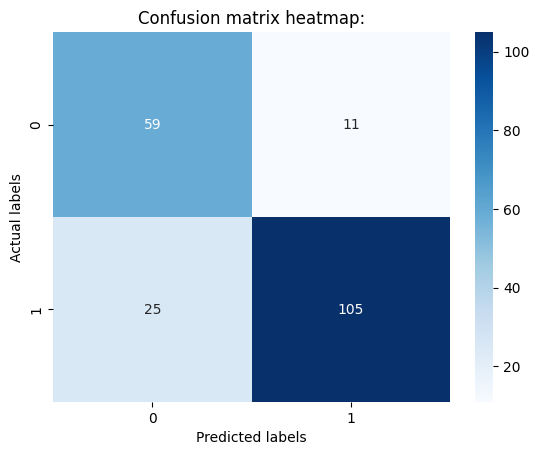

In [63]:
grid_lr=Gridsearch_params(model_lr,param_grid,X_train_smote,y_train_smote)
evolution_models(grid_lr,X_test,y_test)

# Mô hình Decision tree

In [47]:
tree_base = DecisionTreeClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        70
           1       0.88      0.81      0.84       130

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200

------------------------------------------
Recall : 0.8050
Precision : 0.8155
F1 score : 0.8078 



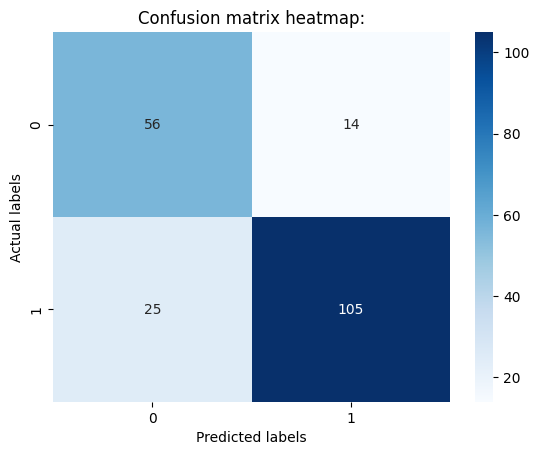

In [48]:
Normal_tree=DecisionTreeClassifier().fit(X_train,y_train)
evolution_models(Normal_tree,X_test,y_test)

Accuracy on each fold: [0.8660287081339713, 0.8564593301435407, 0.8899521531100478, 0.8899521531100478, 0.8894230769230769]
Mean accuracy: 87.84%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        70
           1       0.89      0.92      0.90       130

    accuracy                           0.88       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.88      0.87       200

------------------------------------------
Recall : 0.8750
Precision : 0.8741
F1 score : 0.8743 



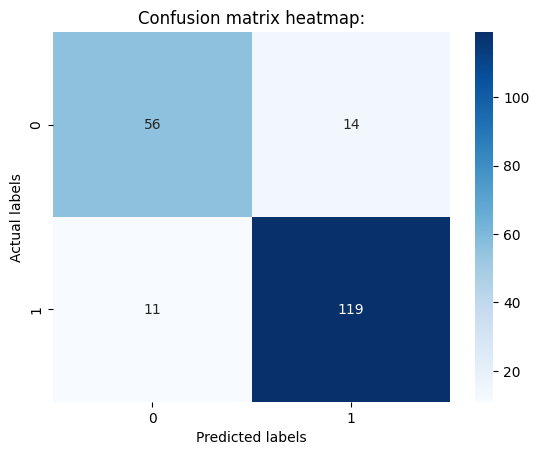

In [49]:
Smote_tree=Train_KFold(tree_base,X_train_smote,y_train_smote)
evolution_models(Smote_tree,X_test,y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best mean accuracy: 85.12 %

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        70
           1       0.92      0.92      0.92       130

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200

------------------------------------------
Recall : 0.9000
Precision : 0.9000
F1 score : 0.9000 



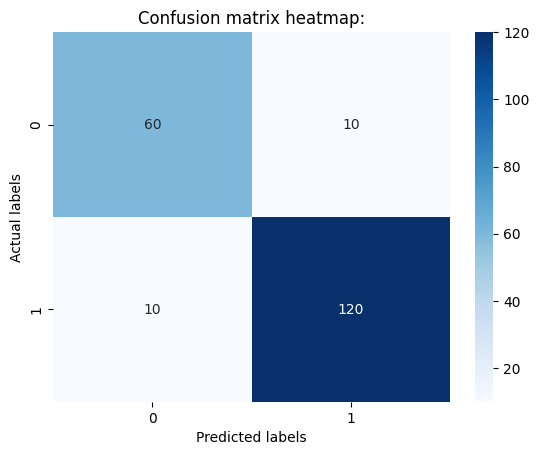

In [50]:
param_grid_2={
    'criterion': ['gini', 'entropy'],       
    'max_depth': [3, 5, 10, None],           
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4]   
}
gird_tree=Gridsearch_params(tree_base,param_grid_2,X_train,y_train)
evolution_models(gird_tree,X_test,y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best mean accuracy: 89.47 %

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        70
           1       0.91      0.88      0.90       130

    accuracy                           0.87       200
   macro avg       0.85      0.86      0.86       200
weighted avg       0.87      0.87      0.87       200

------------------------------------------
Recall : 0.8700
Precision : 0.8723
F1 score : 0.8708 



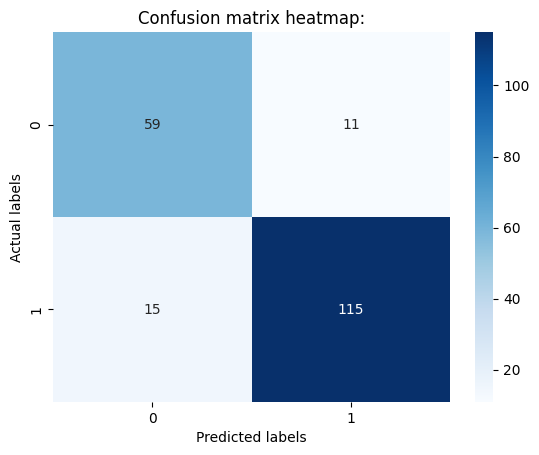

In [51]:
gird_smote_tree=Gridsearch_params(tree_base,param_grid_2,X_train_smote,y_train_smote)
evolution_models(gird_smote_tree,X_test,y_test)

# Random forest

In [52]:
forest_base=RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        70
           1       0.90      0.91      0.90       130

    accuracy                           0.88       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.88      0.87       200

------------------------------------------
Recall : 0.8750
Precision : 0.8746
F1 score : 0.8748 



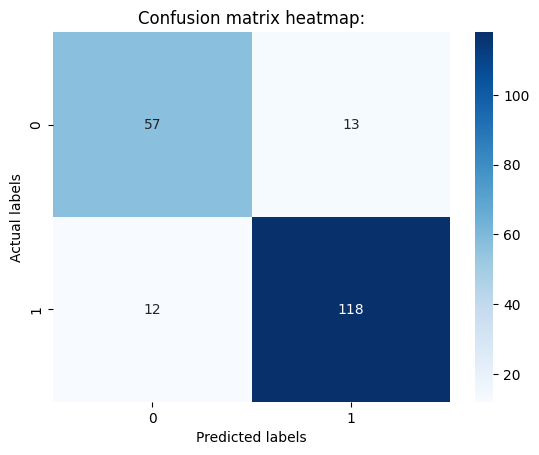

In [53]:
rf_normal = RandomForestClassifier(random_state=42).fit(X_train, y_train)
evolution_models(rf_normal, X_test, y_test)

Accuracy on each fold: [0.9043062200956937, 0.8899521531100478, 0.9282296650717703, 0.9425837320574163, 0.9230769230769231]
Mean accuracy: 91.76%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        70
           1       0.89      0.91      0.90       130

    accuracy                           0.87       200
   macro avg       0.86      0.85      0.86       200
weighted avg       0.87      0.87      0.87       200

------------------------------------------
Recall : 0.8700
Precision : 0.8693
F1 score : 0.8696 



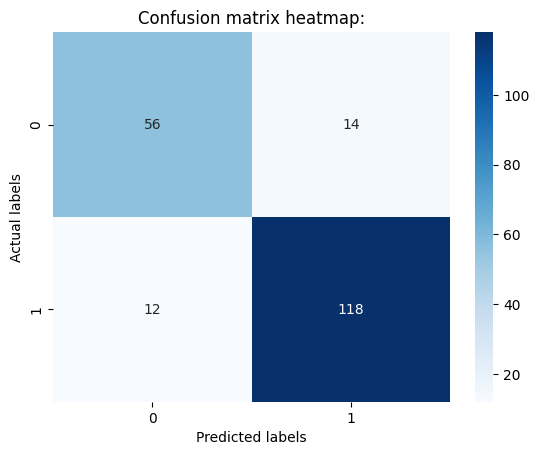

In [54]:
smote_forest=Train_KFold(forest_base,X_train_smote,y_train_smote)
evolution_models(smote_forest,X_test,y_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best mean accuracy: 90.25 %

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        70
           1       0.91      0.95      0.93       130

    accuracy                           0.91       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.91      0.90       200

------------------------------------------
Recall : 0.9050
Precision : 0.9045
F1 score : 0.9041 



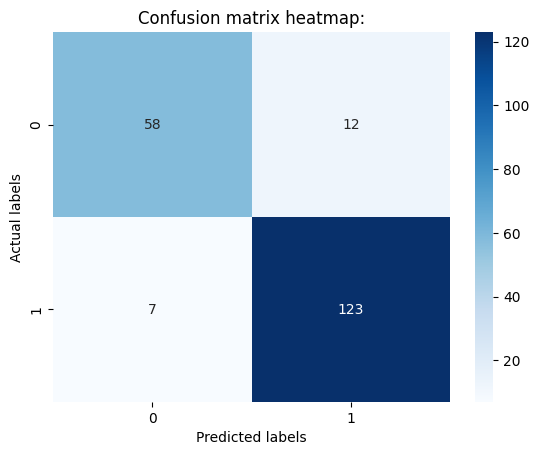

In [55]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],             # Số lượng cây trong rừng
    'max_depth': [None, 10, 20, 30],           # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],           # Số mẫu tối thiểu để tách
    'min_samples_leaf': [1, 2, 4],             # Số mẫu tối thiểu tại mỗi lá
    'criterion': ['gini', 'entropy']           # Tiêu chí đánh giá
}
best_rf_model = Gridsearch_params(forest_base, param_grid_rf, X_train, y_train)
evolution_models(best_rf_model, X_test, y_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best mean accuracy: 93.78 %

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        70
           1       0.92      0.92      0.92       130

    accuracy                           0.90       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.90      0.90      0.90       200

------------------------------------------
Recall : 0.8950
Precision : 0.8954
F1 score : 0.8952 



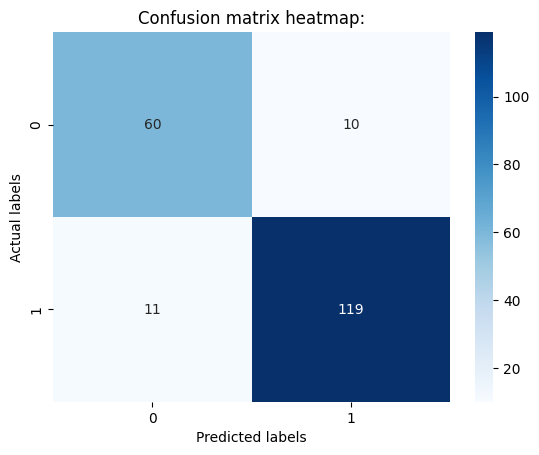

In [56]:
best_smote_forest=Gridsearch_params(forest_base,param_grid_rf,X_train_smote,y_train_smote)
evolution_models(best_smote_forest,X_test,y_test)

# SVM

In [57]:
svm_model=SVC()

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        70
           1       0.88      0.93      0.91       130

    accuracy                           0.88       200
   macro avg       0.87      0.85      0.86       200
weighted avg       0.87      0.88      0.87       200

------------------------------------------
Recall : 0.8750
Precision : 0.8741
F1 score : 0.8733 



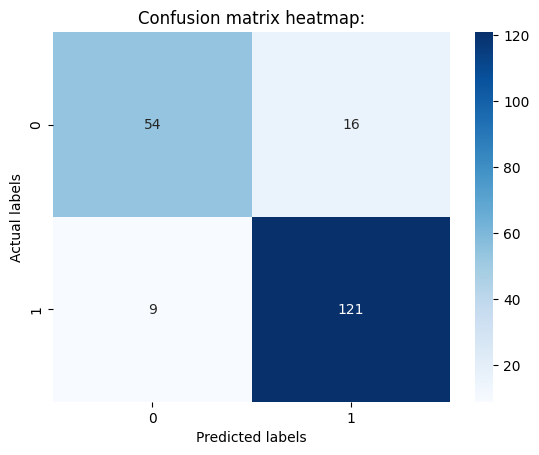

In [58]:
normal_svm = SVC().fit(X_train,y_train)
evolution_models(normal_svm, X_test, y_test)

Accuracy on each fold: [0.9234449760765551, 0.8947368421052632, 0.8947368421052632, 0.9043062200956937, 0.8894230769230769]
Mean accuracy: 90.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        70
           1       0.89      0.89      0.89       130

    accuracy                           0.86       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200

------------------------------------------
Recall : 0.8600
Precision : 0.8600
F1 score : 0.8600 



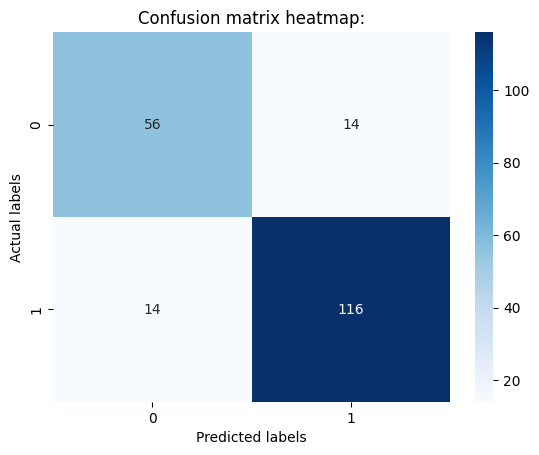

In [59]:
svm_smote = Train_KFold(svm_model, X_train_smote, y_train_smote)
evolution_models(svm_smote, X_test, y_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best mean accuracy: 88.88 %

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        70
           1       0.88      0.93      0.91       130

    accuracy                           0.88       200
   macro avg       0.87      0.85      0.86       200
weighted avg       0.87      0.88      0.87       200

------------------------------------------
Recall : 0.8750
Precision : 0.8741
F1 score : 0.8733 



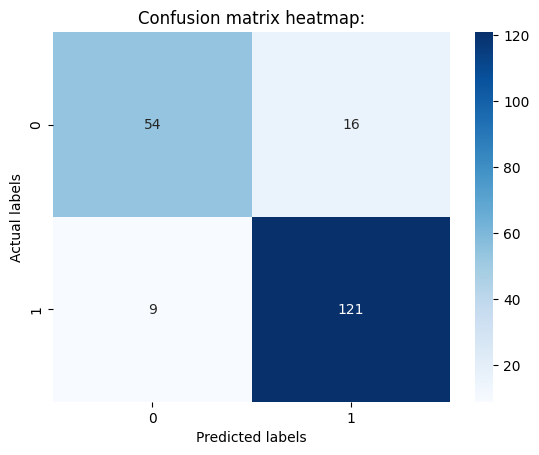

In [60]:
param_grid_3 = {
    'C': [0.1, 1, 10, 100],                   
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'gamma': ['scale', 'auto'],               
    'degree': [2, 3, 4]                       
}
grid_svm=Gridsearch_params(svm_model,param_grid_3,X_train,y_train)
evolution_models(grid_svm,X_test,y_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best mean accuracy: 92.05 %

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        70
           1       0.90      0.94      0.92       130

    accuracy                           0.89       200
   macro avg       0.89      0.87      0.88       200
weighted avg       0.89      0.89      0.89       200

------------------------------------------
Recall : 0.8900
Precision : 0.8893
F1 score : 0.8888 



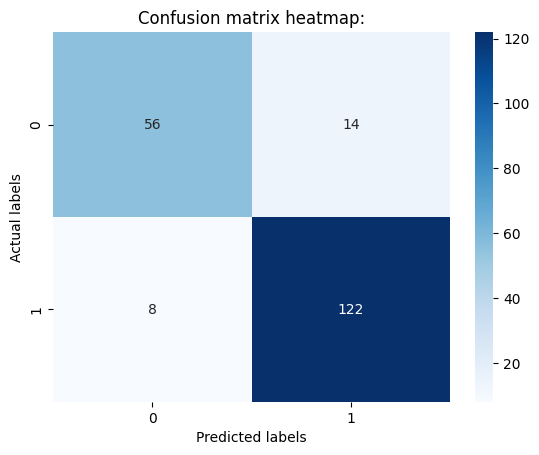

In [61]:
grid_smote_svm=Gridsearch_params(svm_model,param_grid_3,X_train_smote,y_train_smote)
evolution_models(grid_smote_svm,X_test,y_test)

# Tìm tối ưu

In [62]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Đánh giá
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
    }
    if y_pred_proba is not None:
        metrics["AUC-ROC"] = roc_auc_score(y_test, y_pred_proba)
    
    return metrics


In [64]:

models = {
    "Logistic Regression": LogisticRegression(C=200,max_iter=300,penalty='l2',solver='saga'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=4,min_samples_split=10),
    "Random Forest": RandomForestClassifier(criterion='entropy',max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=200),
    "SVM": SVC(C=100,degree=2,gamma='auto',kernel='rbf',probability=True),
}


In [65]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    metrics = train_and_evaluate(model, X_train_smote, X_test, y_train_smote, y_test)
    results[name] = metrics


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training SVM...


In [66]:
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model_metrics = results[best_model_name]

print("Best Model:", best_model_name)
print("Metrics:", best_model_metrics)


Best Model: Random Forest
Metrics: {'Accuracy': 0.895, 'F1 Score': 0.8954885581344725, 'AUC-ROC': 0.9631868131868132}


In [67]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Hoặc scoring khác
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")


d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression: Mean Accuracy = 0.7570
Decision Tree: Mean Accuracy = 0.8620
Random Forest: Mean Accuracy = 0.9060
SVM: Mean Accuracy = 0.6570


In [68]:
import joblib

best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [69]:
import pickle

# Giả sử 'model' là mô hình của bạn
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model, file)
